Gerekli importlar


In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.9.2




```
# This is formatted as code
```

Datayı çekiyoruz yüklüyoruz


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


Classları oluşturduk

In [ ]:
class_names = ['T-shirt', 'Pantolon', 'Kazak', 'Elbise', 'Ceket',
                "Sandalet", "Gömlek", "Spor Ayakkabı", "Çanta", "Bilekten Çizme"]


Biçimini alıyoruz


In [ ]:
train_images.shape


(60000, 28, 28)

Boyutu alıyoruz

In [ ]:
len(train_labels)


60000

Her etiketin 0 ile 9 arasındaki sayısı var

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

10000 veri 28x28 pixel boyunda


In [ ]:
test_images.shape

(10000, 28, 28)

10000 veri var

In [ ]:
len(test_labels)


10000

önceeden işlenmemiş veri

In [2]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


NameError: ignored

255 pixel değeri var

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0


25 tanesini görüntüleyelim 

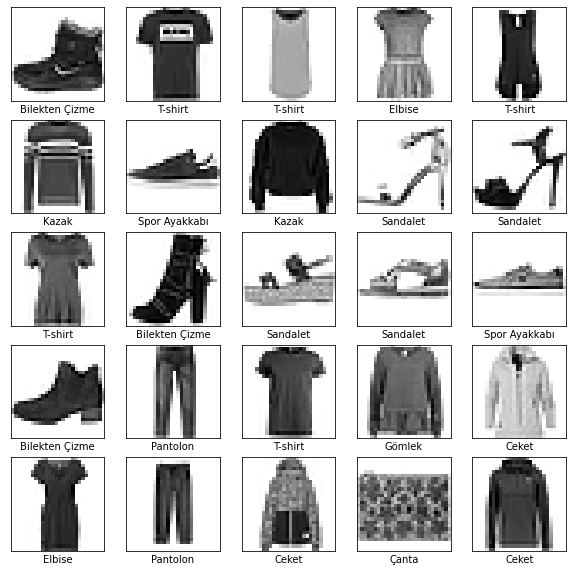

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


katmanları oluşturuyoruz

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


Derliyoruz

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


Eğitiyoruz

In [ ]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5011 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3722 - accuracy: 0.8664
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3371 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2940 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2796 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2679 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2567 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2501 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.242

Doğruluğunu kontrol ediyoruz

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest doğruluğu:', test_acc)

313/313 - 1s - loss: 0.3427 - accuracy: 0.8796 - 549ms/epoch - 2ms/step

Test doğruluğu: 0.8795999884605408


Tahminde bulunuyoruz

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [ ]:
predictions = probability_model.predict(test_images)


313/313 [==============================] - 1s 1ms/step


In [ ]:
predictions[0]


array([1.82937299e-07, 1.11998875e-10, 8.74254003e-10, 7.34001360e-10,
       5.68079028e-10, 5.91532189e-05, 4.33355240e-07, 8.95287469e-03,
       1.14659187e-07, 9.90987241e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])


9

In [ ]:
test_labels[0]


9

10 sınıf tahminin tamamına bamak için grafik 

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


Tahminleri doğrula

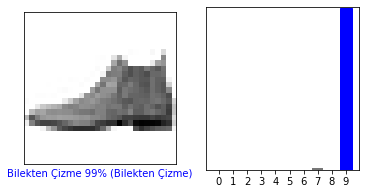

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


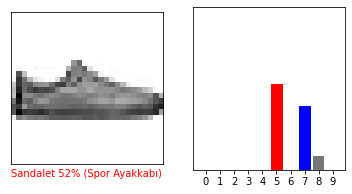

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


Tahminlerle birlitke birkaç resim

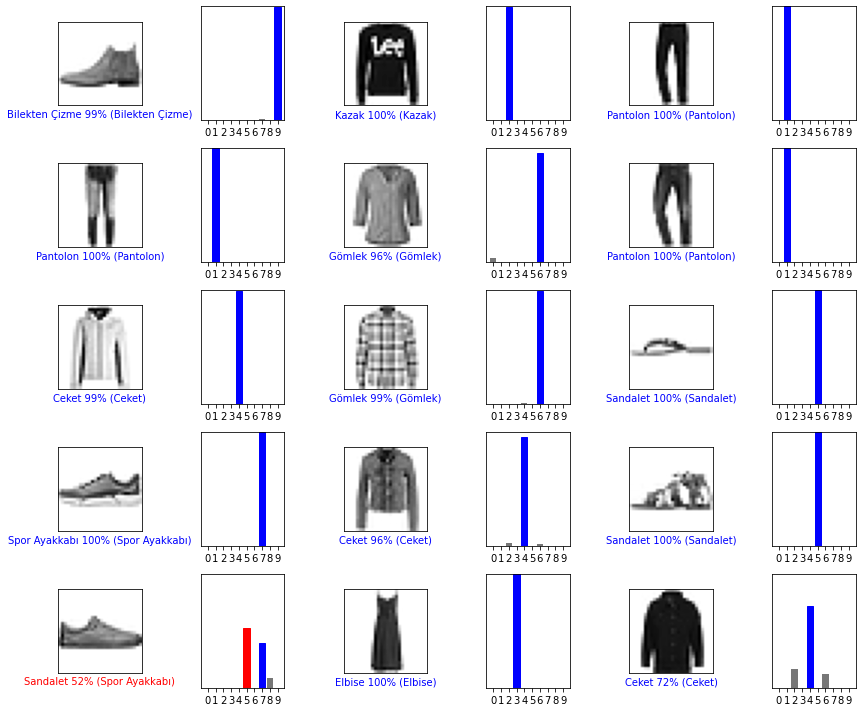

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


Eğitilmiş modeli kullan

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)


(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)


1/1 [==============================] - 0s 20ms/step
[[2.3894208e-05 3.2982140e-13 9.9690139e-01 2.4205310e-12 2.6437622e-03
  1.0753925e-10 4.3099950e-04 9.7519201e-14 9.0304522e-13 2.4748664e-16]]


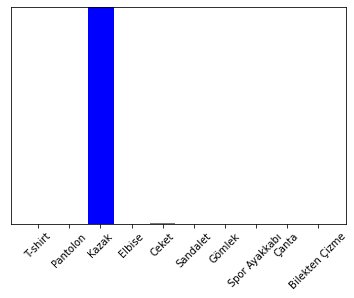

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [ ]:
np.argmax(predictions_single[0])


2

Model beklenildiği etiketi koyuyor 